In [93]:
# Importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt


plt.style.use("ggplot")

In [94]:
# Fazendo upload do arquivo a ser analisado

from google.colab import files
arq = files.upload()

Saving Police Fatalities.csv to Police Fatalities (1).csv


In [95]:
# Criando um dataframe pandas
df = pd.read_csv('Police Fatalities.csv',encoding='unicode_escape',parse_dates=['Date'])

In [96]:
# Lendo as 5 primeiras linhas do data frame
df.head(5)

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,2000-05-04,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,2000-06-02,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,2000-08-13,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2001-02-09,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,2001-06-10,Riverside,CA,Shot,Knife,False,False


In [97]:
# Lendo as 5 últimas linhas do data frame
df.tail(5)

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
12486,12388,Name withheld by police,NaN,Male,NaN,2008-12-09,Sacramento,CA,Other,NaN,False,False
12487,12429,Gene Lovell Ford,48.0,Male,NaN,2008-08-06,Sacramento,CA,Other,NaN,True,False
12488,12430,Jose Vega,38.0,Male,NaN,2008-08-06,Visalia,CA,Other,NaN,True,False
12489,12636,Humberto Torres,41.0,Male,NaN,2009-03-21,Delano,CA,Other,Gun,False,False
12490,12861,Name withheld by police,39.0,Male,NaN,2010-01-15,Los Angeles,CA,Other,NaN,False,False


In [98]:
# Vendo a quantidade de linhas e colunas do arquivo
df.shape

(12491, 12)

In [99]:
# Verificando os tipos de dados
df.dtypes

UID                         int64
Name                       object
Age                       float64
Gender                     object
Race                       object
Date               datetime64[ns]
City                       object
State                      object
Manner_of_death            object
Armed                      object
Mental_illness               bool
Flee                         bool
dtype: object

In [100]:
# O Número total de linhas da base de dados
df['Age'].describe()

count    12258.000000
mean        35.269538
std         12.979532
min          1.000000
25%         25.000000
50%         33.000000
75%         44.000000
max        107.000000
Name: Age, dtype: float64

In [101]:
# Quantidade de valores nulos por coluna
df.isnull().sum()

UID                   0
Name                  0
Age                 233
Gender                8
Race               3965
Date                  0
City                  4
State                 0
Manner_of_death       0
Armed              5677
Mental_illness        0
Flee                  0
dtype: int64

In [102]:
# Renomeando o DataFrame
df.rename(columns={"UID" : "Identificador",
                   "Name" : "Nome",
                   "Age" : "Idade",
                   "Gender" : "Genero",
                   "Race" : "Raca",
                   "Date": "Data",
                   "City" : "Cidade",
                   "State" : "Estado",
                   "Manner_of_death" : "Forma que morreu",
                   "Armed": "Armado",
                   "Mental_illness" : "Doença Mental?",
                   "Flee" : "Fugiu?"}, inplace = True)

In [103]:
# Primeiras 5 linhas
df.head(5)

,Identificador,Nome,Idade,Genero,Raca,Data,Cidade,Estado,Forma que morreu,Armado,Doença Mental?,Fugiu?
0,133,Karen O. Chin,44.0,Female,Asian,2000-05-04,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,2000-06-02,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,2000-08-13,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2001-02-09,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,2001-06-10,Riverside,CA,Shot,Knife,False,False


In [104]:
# Idade média das pessoas mortas
round(df['Idade'].mean())

35

In [105]:
# Adicionando colunas de Ano, Mês e Dia das ocorrências
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.day


In [106]:
# A maior idade da base de dados
df['Idade'].max()

107.0

In [107]:
# A menor idade da base de dados
df['Idade'].min()

1.0

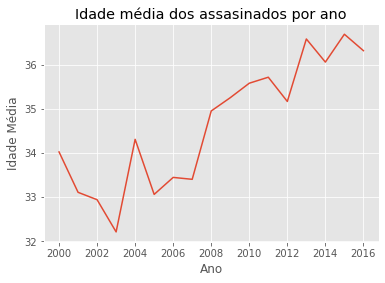

In [108]:
# Idade média dos assasinados por ano
df.groupby('Ano')['Idade'].mean().plot(title="Idade média dos assasinados por ano")
plt.ylabel("Idade Média");

In [109]:
# Contagem por forma de morte
forma_morte = df.groupby('Forma que morreu')['Identificador'].count().sort_values(ascending=False)
forma_morte

Forma que morreu
Shot                11800
Tasered               542
Shot and Tasered      120
Other                  29
Name: Identificador, dtype: int64

In [110]:
# Renomeando as formas de morte
forma_morte.rename({'Shot':'Tiro',
                         'Tasered' : 'Taser',
                         'Shot and Tasered' : 'Tiro e Taser',
                         'Other' : 'Outro'},inplace=True)
forma_morte

Forma que morreu
Tiro            11800
Taser             542
Tiro e Taser      120
Outro              29
Name: Identificador, dtype: int64

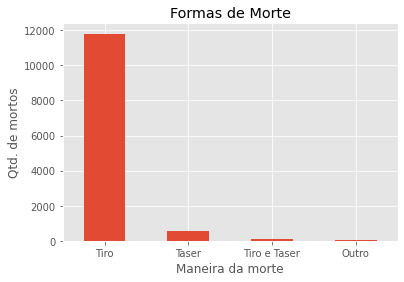

In [111]:
# Plotando uma visualização das maneiras de morte
forma_morte.plot.bar(title="Formas de Morte",stacked=True);
plt.ylabel("Qtd. de mortos")
plt.xlabel("Maneira da morte")
plt.xticks(rotation="horizontal");

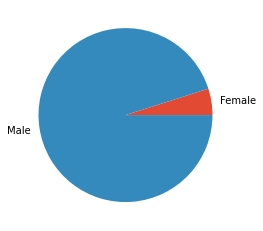

In [112]:
# Mortos por Genero
df.groupby('Genero')['Identificador'].count().plot.pie()
plt.ylabel("");

In [113]:
# Verificando os mortos por raça
mortos_por_raca = df.groupby('Raca')['Identificador'].count().sort_values(ascending=True).reset_index()
total_mortos = mortos_por_raca.Identificador.sum()
mortos_por_raca['%'] = mortos_por_raca['Identificador']/total_mortos
mortos_por_raca['%'] = pd.Series([round(val, 2) for val in mortos_por_raca['%']], index = mortos_por_raca.index)
mortos_por_raca['% Formatado'] = pd.Series(["{0:.2f}%".format(val * 100) for val in mortos_por_raca['%']], index = mortos_por_raca.index);
mortos_por_raca.rename(columns={'Identificador' : 'Total'}, inplace=True)
mortos_por_raca

,Raca,Total,%,% Formatado
0,Other,48,0.01,1.00%
1,Native,130,0.02,2.00%
2,Asian,173,0.02,2.00%
3,Hispanic,1784,0.21,21.00%
4,Black,2536,0.30,30.00%
5,White,3855,0.45,45.00%


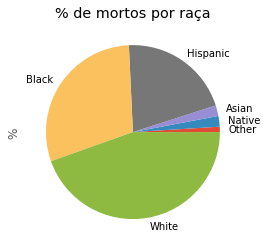

In [114]:
mortos_por_raca.set_index('Raca')['%'].plot.pie(title='% de mortos por raça')

In [115]:
df.head()

,Identificador,Nome,Idade,Genero,Raca,Data,Cidade,Estado,Forma que morreu,Armado,Doença Mental?,Fugiu?,Ano,Mes,Dia
0,133,Karen O. Chin,44.0,Female,Asian,2000-05-04,Alameda,CA,Shot,NaN,False,False,2000,5,4
1,169,Chyraphone Komvongsa,26.0,Male,Asian,2000-06-02,Fresno,CA,Shot,NaN,False,False,2000,6,2
2,257,Ming Chinh Ly,36.0,Male,Asian,2000-08-13,Rosemead,CA,Shot,Gun,False,False,2000,8,13
3,483,Kinh Quoc Dao,29.0,Male,Asian,2001-02-09,Valley Glen,CA,Shot,Gun,False,False,2001,2,9
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,2001-06-10,Riverside,CA,Shot,Knife,False,False,2001,6,10


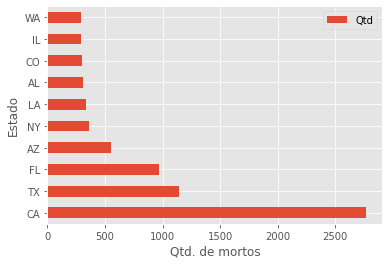

In [140]:
# Os 20 estados com o maior número de mortos na base
mortos_por_regiao = df.groupby(['Estado','Genero'])['Identificador'].count().reset_index().sort_values(['Identificador'], ascending=False)
mortos_por_regiao.rename(columns={'Identificador' : 'Qtd'}, inplace=True)
mortos_por_regiao.set_index('Estado', inplace=True)
mortos_por_regiao.head(10).plot.barh(stacked=True)
plt.xlabel('Qtd. de mortos');


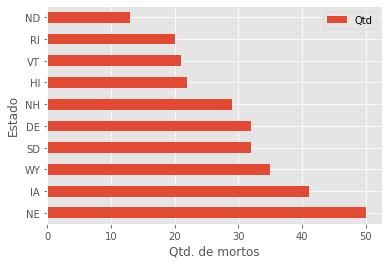

In [136]:
# Os 20 estados com o menor número de mortos na base
mortos_por_regiao.tail(10).plot.barh()
plt.xlabel('Qtd. de mortos');